In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from image_utils import read_gz_file, open_all_ims_in_dir


def gaussian(x, a, x0, sigma, offset):
    return a * np.exp(-((x - x0) ** 2) / (2 * sigma**2)) + offset


roi = {
    "xMain": np.array([620, 1400]),
    "yMain": np.array([416, 800]),
}

file_list = open_all_ims_in_dir("Absorptiondata/2")

x_length = roi["xMain"][1] - roi["xMain"][0]
y_length = roi["yMain"][1] - roi["yMain"][0]

x_vals_centered = np.arange(x_length) - x_length / 2
y_vals_centered = np.arange(y_length) - y_length / 2

file_indices = []
x0_values = []
sigma_x_values = []
y0_values = []
sigma_y_values = []

for file in file_list:
    img = read_gz_file(file, returnRaw=False, returnDict=False)
    cropped = img[slice(*roi["yMain"]), slice(*roi["xMain"])]
    projection_x = np.sum(cropped, axis=0)
    projection_y = np.sum(cropped, axis=1)

    popt_x, _ = curve_fit(gaussian, x_vals_centered, projection_x)
    popt_y, _ = curve_fit(gaussian, y_vals_centered, projection_y)

    file_indices.append(int(file[-5:-3]))
    x0_values.append(popt_x[1] + x_length / 2 + roi["xMain"][0])
    sigma_x_values.append(popt_x[2])
    y0_values.append(popt_y[1] + y_length / 2 + roi["yMain"][0])
    sigma_y_values.append(popt_y[2])

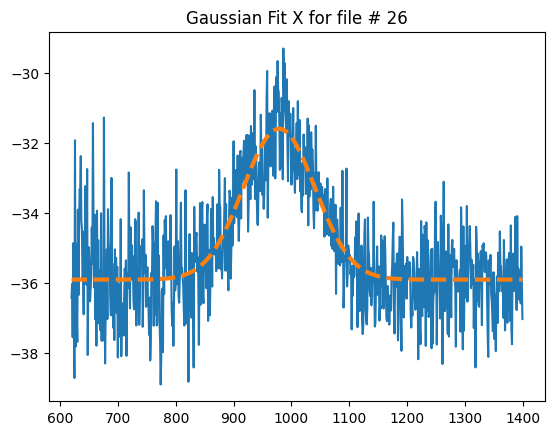

In [ ]:
plt.plot(x_vals_centered + x_length / 2 + roi["xMain"][0], projection_x, label="X Projection")
plt.plot(
    x_vals_centered + x_length / 2 + roi["xMain"][0],
    gaussian(x_vals_centered, *popt_x),
    label="Gaussian Fit X",
    linestyle="--",
    linewidth=3,
)
plt.title(f"Gaussian Fit X for file # {file[-5:-3]}")
# plt.savefig("gaussian_fit_x.png", dpi=600)
plt.show()

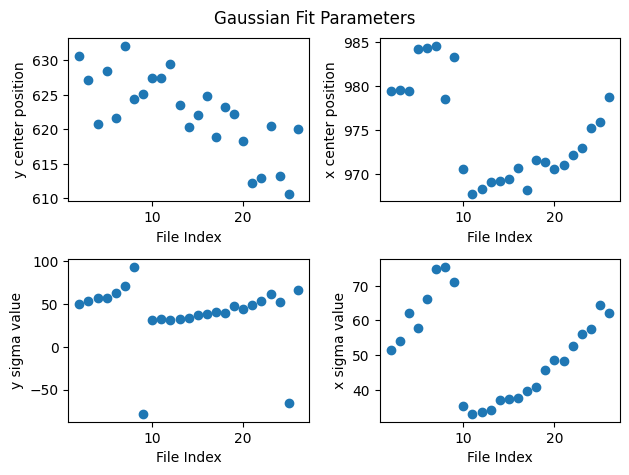

In [ ]:
# x and y centers and sigmas
plt.subplot(2, 2, 1)
plt.scatter(file_indices, y0_values, label="y0")
plt.xlabel("File Index")
plt.ylabel("y center position")
plt.subplot(2, 2, 2)
plt.scatter(file_indices, x0_values, label="x0")
plt.xlabel("File Index")
plt.ylabel("x center position")
plt.subplot(2, 2, 3)
plt.scatter(file_indices, sigma_y_values, label="sigma_y")
plt.xlabel("File Index")
plt.ylabel("y sigma value")
plt.tight_layout()
plt.subplot(2, 2, 4)
plt.scatter(file_indices, sigma_x_values, label="sigma_x")
plt.xlabel("File Index")
plt.ylabel("x sigma value")
plt.tight_layout()
plt.suptitle("Gaussian Fit Parameters")
plt.subplots_adjust(top=0.92)
# plt.savefig("gaussian_fit_parameters.png", dpi=600)
plt.show()